# Tweedimensionale voorbeelden

In [1]:
import sympy as sp
import numpy as np
from sympy import symbols, And, Or
E, I = symbols('E, I')
x = symbols('x')
a = symbols('a')
s = symbols('s')
sf = sp.SingularityFunction
import matplotlib.pyplot as plt
from sympy import Piecewise
import pandas as pd

In [2]:
#Voorbeeld 5, Berekening van de onbekendes
Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc, wb, ub, alpha, a = sp.symbols('Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc, wb, ub, alpha, a')

hoek_rad = sp.rad(alpha)
# hoek_rad = sp.rad(0*sp.Function('sf')(s, 0, 0) - 0*sp.Function('sf')(s, 10, 0) + 90*sp.Function('sf')(s, 10, 0) - 90*sp.Function('sf')(s, 15, 0) + 0*sp.Function('sf')(s, 15, 0) - 0*sp.Function('sf')(s, 20, 0))
# display(hoek_rad)

V20 = -Av - 1*sp.cos(hoek_rad) - Cv - Bv
M20 = -Am - 20*Av - 10*Cv - 1*sp.cos(hoek_rad)*sp.Function('sf')(20, a, 1) - 10*Bv - 5*Cv
N20 = -Ah - Bh - Ch + 1*sp.sin(hoek_rad)
N10 = -Ah - Bh + 1*sp.sin(hoek_rad) - Av - 1*sp.cos(hoek_rad)
V10 = -Av - Bv - 1*sp.cos(hoek_rad) + Ah - 1*sp.sin(hoek_rad)
N15 = -Ah - Bh - Ch + 1*sp.sin(hoek_rad) + Av + 1*sp.cos(hoek_rad) + Bv
V15 = -Av - 1*sp.cos(hoek_rad) - Bv - Cv - Ah - Bh + 1*sp.sin(hoek_rad)

u10 = -10*Ah -ub + 1*sp.sin(hoek_rad)*sp.Function('sf')(10, a, 1) + 50*Am + (1000/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(10, a, 3)
w10 = 50*Am + (1000/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(10, a, 3) + wb + 10*Ah - 1*sp.sin(hoek_rad)*sp.Function('sf')(10, a, 1)
u15 = -15*Ah - 5*Bh -ub - uc + 1*sp.sin(hoek_rad)*sp.Function('sf')(15, a, 1) - (225/2)*Am - (3375/6)*Av - (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(15, a, 3) - (125/6)*Bv - wb
w15 = (225/2)*Am + (3375/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(15, a, 3) + (125/6)*Bv + wb + wc - 15*Ah - 5*Bh - ub + 1*sp.sin(hoek_rad)*sp.Function('sf')(15, a, 1)

oplossing = sp.solve((V20, M20, N20, N20, N10, V10, N15, V15, u10, w10, u15, w15), (Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc, wb, ub))
oplossing_in_breuken = {variabele: sp.nsimplify(waarde) for variabele, waarde in oplossing.items()}
oplossing_df = pd.DataFrame([(str(variabele), waarde) for variabele, waarde in oplossing_in_breuken.items()], columns=["Variabele", "Waarde"])

pd.set_option('display.latex.repr', True)
pd.set_option('display.max_colwidth', None)

display(oplossing_df)

,Variabele,Waarde
0,Am,"-sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000) + 20*cos(174532925199433*alpha/10000000000000000)"
1,Av,-cos(174532925199433*alpha/10000000000000000)
2,Cv,0
3,Bv,0
4,Ah,sin(174532925199433*alpha/10000000000000000)
5,Ch,0
6,Bh,0
7,uc,"-2*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000) + sf(15, a, 1)*sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*cos(174532925199433*alpha/10000000000000000)/6 + 225*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/2 + 5*sin(174532925199433*alpha/10000000000000000) - 3375*cos(174532925199433*alpha/10000000000000000)/2"
8,wc,"sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/3 - sf(15, a, 1)*sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*cos(174532925199433*alpha/10000000000000000)/6 + 25*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/2 + 15*sin(174532925199433*alpha/10000000000000000) - 125*cos(174532925199433*alpha/10000000000000000)/6"
9,wb,"sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000) - sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/6 + 50*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000) - 10*sin(174532925199433*alpha/10000000000000000) - 2500*cos(174532925199433*alpha/10000000000000000)/3"


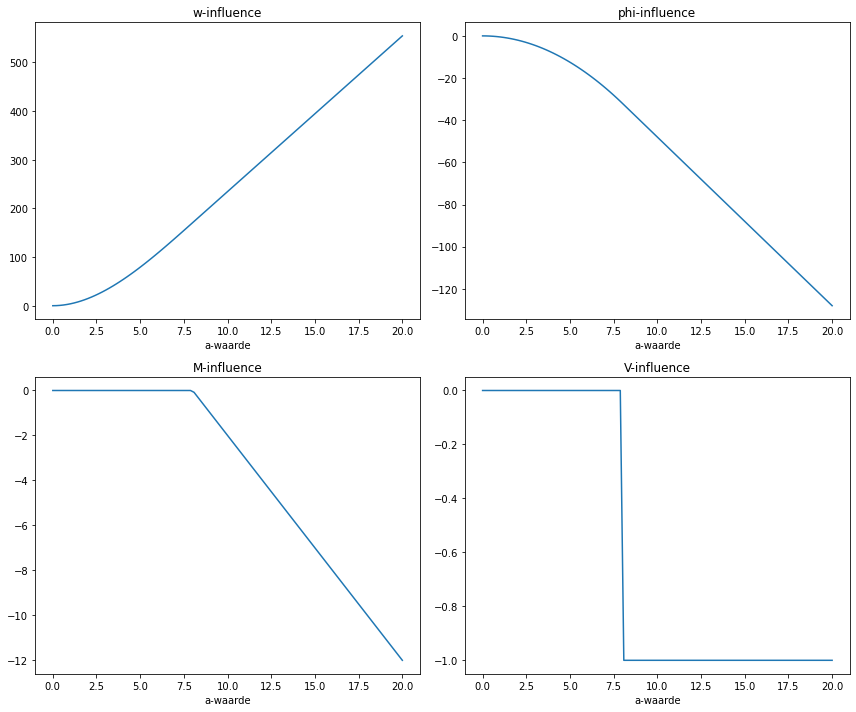

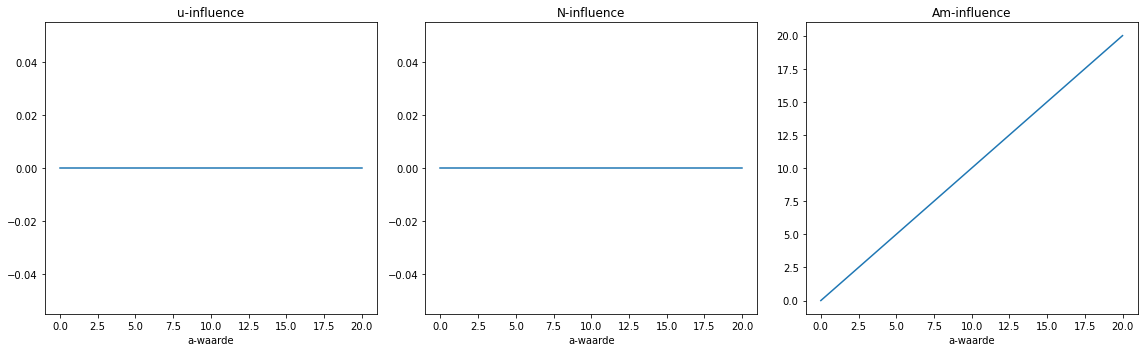

In [3]:
#Voorbeeld 5, Plotjes van de invloedslijnen

hoek_rad = sp.rad(alpha)


Am = -sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + 20*sp.cos(174532925199433*alpha/10000000000000000)
Ah = sp.sin(174532925199433*alpha/10000000000000000)
Bh = 0
Ch = 0
Bv = 0
Av = -sp.cos(174532925199433*alpha/10000000000000000)
Cv = 0
ub = sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 - 50*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 10*sp.sin(174532925199433*alpha/10000000000000000) + 2500*sp.cos(174532925199433*alpha/10000000000000000)/3
wb = sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 50*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 10*sp.sin(174532925199433*alpha/10000000000000000) - 2500*sp.cos(174532925199433*alpha/10000000000000000)/3
uc = -2*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 225*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 + 5*sp.sin(174532925199433*alpha/10000000000000000) - 3375*sp.cos(174532925199433*alpha/10000000000000000)/2
wc = sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/3 - sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 25*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 + 15*sp.sin(174532925199433*alpha/10000000000000000) - 125*sp.cos(174532925199433*alpha/10000000000000000)/6

w = (1/2)*Am*sf(s, 0, 2) + (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Bv*sf(s, 10, 3) + wb*sf(s, 10, 0) + (1/6)*Cv*sf(s, 15, 3) + wc*sf(s, 15, 0)
wV = (1/2)*Am*sf(s, 0, 2) + (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Bv*sf(s, 10, 3) + (1/6)*Cv*sf(s, 15, 3)    
phi = sp.diff(w, s)*-1
M = sp.diff(phi, s)
V = sp.diff(wV, s, 3)

U = (-Ah*sf(s, 0, 1) - Bh*sf(s, 10, 1) - ub*sf(s, 10, 0) - Ch*sf(s, 15, 1) - uc*sf(s, 15, 0)) + 1*sp.sin(hoek_rad)*sf(s, a, 1)
N = sp.diff(U, s)

s_value = 8
a_values = np.linspace(0, 20, 100)



# alpha_value = 0*sf(s, 0, 0) - 0*sf(s, 10, 0) + 90*sf(s, 10, 0) - 90*sf(s, 15, 0) + 0*sf(s, 15, 0) - 0*sf(s, 20, 0)
# display(alpha_value)

condition1 = And(0 <= s_value, s_value <= 10)
condition2 = And(15 <= s_value, s_value <= 20)

if condition1 or condition2:
    alpha_value = 0
else:
    alpha_value = 90
    

w_values = [w.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
phi_values = [phi.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
M_values = [M.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Am_values = [Am.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
V_values = [V.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
U_values = [U.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
N_values = [N.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]

plt.figure(figsize=(12, 10))


plt.subplot(221)
plt.plot(a_values, w_values)
plt.title('w-influence')
plt.xlabel('a-waarde')
plt.subplot(222)
plt.plot(a_values, phi_values)
plt.title('phi-influence')
plt.xlabel('a-waarde')
plt.subplot(223)
plt.plot(a_values, M_values)
plt.title('M-influence')
plt.xlabel('a-waarde')
plt.subplot(224)
plt.plot(a_values, V_values)
plt.title('V-influence')
plt.xlabel('a-waarde')


plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.plot(a_values, U_values)
plt.title('u-influence')
plt.xlabel('a-waarde')
plt.subplot(132)
plt.plot(a_values, N_values)
plt.title('N-influence')
plt.xlabel('a-waarde')
plt.subplot(133)
plt.plot(a_values, Am_values)
plt.title('Am-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

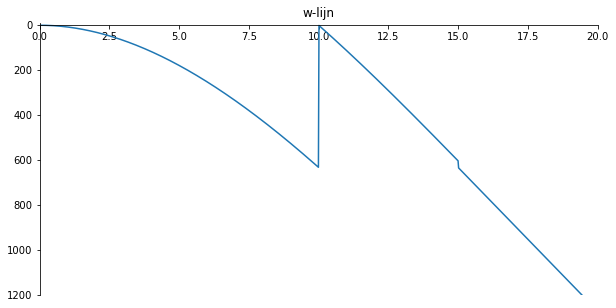

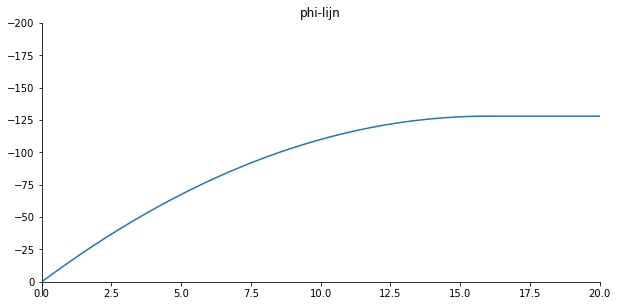

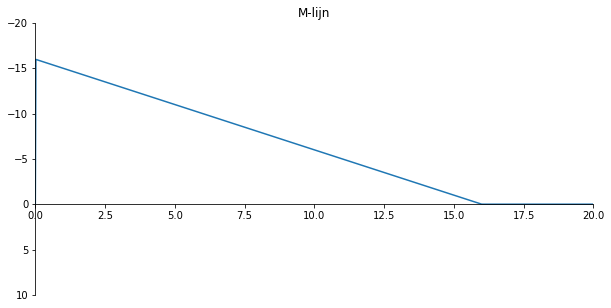

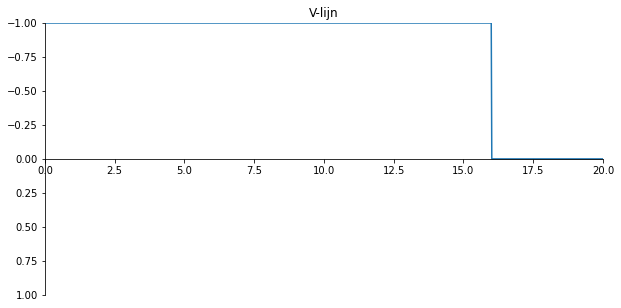

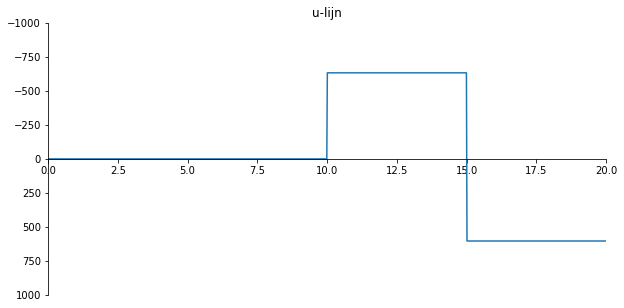

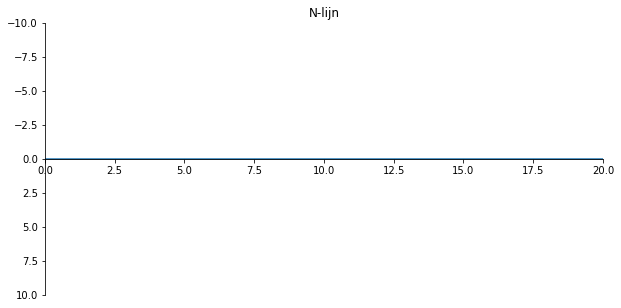

In [4]:
a_value = 16

condition1 = And(0 <= a_value, a_value <= 10)
condition2 = And(15 <= a_value, a_value <= 20)

if condition1 or condition2:
    alpha_value = 0
else:
    alpha_value = 90
    

w_numpy = sp.lambdify(s, w.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
phi_numpy = sp.lambdify(s, phi.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
M_numpy = sp.lambdify(s, M.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
V_numpy = sp.lambdify(s, V.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
u_numpy = sp.lambdify(s, U.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
N_numpy = sp.lambdify(s, N.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), w_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([1200, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('w-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), phi_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([10, -200])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('phi-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), M_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([10, -20])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('M-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), V_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([1, -1])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('V-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), u_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([1000, -1000])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('u-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), N_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([10, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('N-lijn')

plt.show()

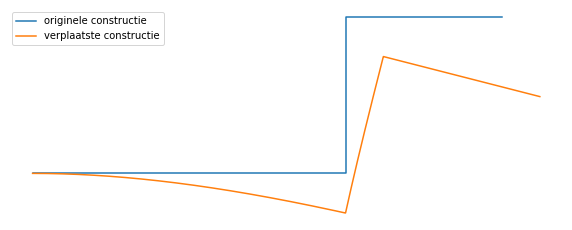

In [5]:
# voorbeeld 5, 2D plot
factor = sp.symbols('factor')

Am = -sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + 20*sp.cos(174532925199433*alpha/10000000000000000)
Ah = sp.sin(174532925199433*alpha/10000000000000000)
Bh = 0
Ch = 0
Bv = 0
Av = -sp.cos(174532925199433*alpha/10000000000000000)
Cv = 0
ub = sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 - 50*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 10*sp.sin(174532925199433*alpha/10000000000000000) + 2500*sp.cos(174532925199433*alpha/10000000000000000)/3
wb = sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 50*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 10*sp.sin(174532925199433*alpha/10000000000000000) - 2500*sp.cos(174532925199433*alpha/10000000000000000)/3
uc = -2*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 225*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 + 5*sp.sin(174532925199433*alpha/10000000000000000) - 3375*sp.cos(174532925199433*alpha/10000000000000000)/2
wc = sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/3 - sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 25*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 + 15*sp.sin(174532925199433*alpha/10000000000000000) - 125*sp.cos(174532925199433*alpha/10000000000000000)/6



w = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Bv*sf(x, 10, 3) + wb*sf(x, 10, 0) + (1/6)*Cv*sf(x, 15, 3) + wc*sf(x, 15, 0))/factor
U = ((-Ah*sf(x, 0, 1) - Bh*sf(x, 10, 1) - ub*sf(x, 10, 0) - Ch*sf(x, 15, 1) - uc*sf(x, 15, 0)) + 1*sp.sin(hoek_rad)*sf(x, a, 1))/factor


a_value = 16


u_test = U.subs(factor, 500).subs(a, a_value).subs(alpha, alpha_value)
w_test = w.subs(factor, 500).subs(a, a_value).subs(alpha, alpha_value)


x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * x
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * 10
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (x-5)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * 0
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * (-x+10)
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (-5)).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * u_test
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * w_test
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * u_test).expand().rewrite(sp.Piecewise)
z_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * w_test
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * -u_test
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * w_test).expand().rewrite(sp.Piecewise)
x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)


plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)), z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='verplaatste constructie')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()


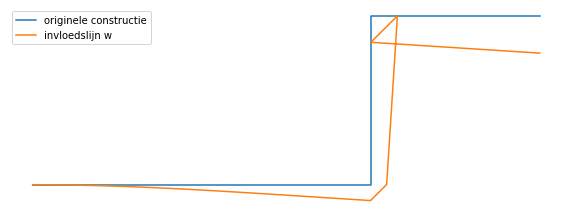

In [6]:
# Voorbeeld 5, invloedslijn 2D
x_value = 8
condition1 = And(0 <= x_value, x_value <= 10)
condition2 = And(15 <= x_value, x_value <= 20)

if condition1 or condition2:
    alpha_value = 0
else:
    alpha_value = 90


w2 = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Bv*sf(x, 10, 3) + wb*sf(x, 10, 0) + (1/6)*Cv*sf(x, 15, 3) + wc*sf(x, 15, 0))/factor
wV2 = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Bv*sf(x, 10, 3) + (1/6)*Cv*sf(x, 15, 3))/factor  
phi2 = sp.diff(w2, x)*-1
M2 = sp.diff(phi2, x)
V2 = sp.diff(wV2, x, 3)

u2 = ((-Ah*sf(x, 0, 1) - Bh*sf(x, 10, 1) - ub*sf(x, 10, 0) - Ch*sf(x, 15, 1) - uc*sf(x, 15, 0)) + 1*sp.sin(hoek_rad)*sf(x, a, 1))/factor
N2 = sp.diff(u2, x)

Am2 = Am/factor

u_testt = u2.subs(factor, 5).subs(x, x_value).subs(alpha, alpha_value)
w_testt = w2.subs(factor, 500).subs(x, x_value).subs(alpha, alpha_value)
phi_testt = phi2.subs(factor, 100).subs(x, x_value).subs(alpha, alpha_value)
M_testt = M2.subs(factor, 5).subs(x, x_value).subs(alpha, alpha_value)
V_testt = V2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
N_testt = N2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
Am_testt = Am2.subs(factor, 20).subs(x, x_value).subs(alpha, alpha_value)

u_test = u_testt.subs(a, x)
w_test = w_testt.subs(a, x)
phi_test = phi_testt.subs(a, x)
M_test = M_testt.subs(a, x)
V_test = V_testt.subs(a, x)
N_test = N_testt.subs(a, x)
Am_test = Am_testt.subs(a, x)



x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * x
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * 10
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (x-5)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * 0
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,15,0)) * (-x+10)
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (-5)).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * 0
        + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, 15, 0)) * w_test
        + (sp.SingularityFunction(x, 15, 0) - sp.SingularityFunction(x, 20, 0)) * 0).expand().rewrite(sp.Piecewise)

z_res = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * w_test
        + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, 15, 0)) * 0
        + (sp.SingularityFunction(x, 15, 0) - sp.SingularityFunction(x, 20, 0)) * w_test).expand().rewrite(sp.Piecewise)

x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)

plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)), z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='invloedslijn w')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()


In [7]:
#Voorbeeld 6, bepalen van onbekende
Av, Cv, Dv, Bv, Ah, Ch, Dh, Bh, uc, Cphi, wc, ud, phiS, wd, alpha, a = sp.symbols('Av Cv Dv Bv Ah Ch Dh Bh uc Cphi wc ud phiS wd alpha a')

hoek_rad = sp.rad(alpha)

V20 = -Av - 1*sp.cos(hoek_rad) - Cv - Dv - Bv
M10 = -10*Av - 1*sp.cos(hoek_rad)*sp.Function('sf')(10, a, 1) - 5*Cv
M20 = -20*Av - 1*sp.cos(hoek_rad)*sp.Function('sf')(20, a, 1) - 15*Cv - 5*Dv
N20 = -Ah - Ch - Dh - Bh + 1*sp.sin(hoek_rad)
N5 = -Ah - Ch + 1*sp.sin(hoek_rad) + Av + 1*sp.cos(hoek_rad)
V5 = -Av - 1*sp.cos(hoek_rad) - Cv - Ah + 1*sp.sin(hoek_rad)
N15 = -Ah - Ch - Dh + 1*sp.sin(hoek_rad) + Av + 1*sp.cos(hoek_rad) + Cv
V15 = -Av - 1*sp.cos(hoek_rad) - Cv - Dv - Ah - Ch + 1*sp.sin(hoek_rad)

u5 = -5*Ah - uc + 1*sp.sin(hoek_rad)*sp.Function('sf')(5, a, 1) - (125/6)*Av - (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(5, a, 3) + 5*Cphi
w5 = (125/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(5, a, 3) + wc - 5*Cphi - 5*Ah + 1*sp.sin(hoek_rad)*sp.Function('sf')(5, a, 1)
u15 = -15*Ah - 10*Ch - uc - ud + 1*sp.sin(hoek_rad)*sp.Function('sf')(15, a, 1) - (3375/6)*Av - (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(15, a, 3) - (1000/6)*Cv - wc - 5*phiS + 15*Cphi
w15 = (3375/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(15, a, 3) + (1000/6)*Cv + wc + 5*phiS + wd - 15*Cphi - 15*Ah - 10*Ch - uc + 1*sp.sin(hoek_rad)*sp.Function('sf')(15, a, 1)
w20 = (8000/6)*Av + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(20, a, 3) + (3375/6)*Cv + wc + 10*phiS + (125/6)*Dv - 20*Cphi + wd
u20 = -20*Ah - 15*Ch - uc - 5*Dh - ud + 1*sp.sin(hoek_rad)*sp.Function('sf')(20, a, 1)

oplossing = sp.solve((V20, M10, M20, N20, N5, V5, N15, V15, u5, w5, u15, w15, w20, u20), (Av, Cv, Dv, Bv, Ah, Ch, Dh, Bh, uc, Cphi, wc, ud, phiS, wd))
oplossing_in_breuken = {variabele: sp.nsimplify(waarde) for variabele, waarde in oplossing.items()}
oplossing_df = pd.DataFrame([(str(variabele), waarde) for variabele, waarde in oplossing_in_breuken.items()], columns=["Variabele", "Waarde"])

display(oplossing_df)

,Variabele,Waarde
0,Av,"-sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10 - cos(174532925199433*alpha/10000000000000000)"
1,Cv,"sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 + 2*cos(174532925199433*alpha/10000000000000000)"
2,Dv,"sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 - 2*cos(174532925199433*alpha/10000000000000000)"
3,Bv,"-sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10"
4,Ah,"sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10 + sin(174532925199433*alpha/10000000000000000) - 2*cos(174532925199433*alpha/10000000000000000)"
5,Ch,"-sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 + 2*cos(174532925199433*alpha/10000000000000000)"
6,Dh,"sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/5 + 2*cos(174532925199433*alpha/10000000000000000)"
7,Bh,"sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10 - 2*cos(174532925199433*alpha/10000000000000000)"
8,uc,"-sf(5, a, 3)*cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/2 + 119*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/12 - 10*sin(174532925199433*alpha/10000000000000000) - 250*cos(174532925199433*alpha/10000000000000000)/3"
9,Cphi,"-sf(5, a, 1)*sin(174532925199433*alpha/10000000000000000)/5 - 19*sf(10, a, 1)*cos(174532925199433*alpha/10000000000000000)/30 + sf(15, a, 3)*cos(174532925199433*alpha/10000000000000000)/30 + sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/10 + 5*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/2 - sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/60 - sin(174532925199433*alpha/10000000000000000) - 137*cos(174532925199433*alpha/10000000000000000)/6"


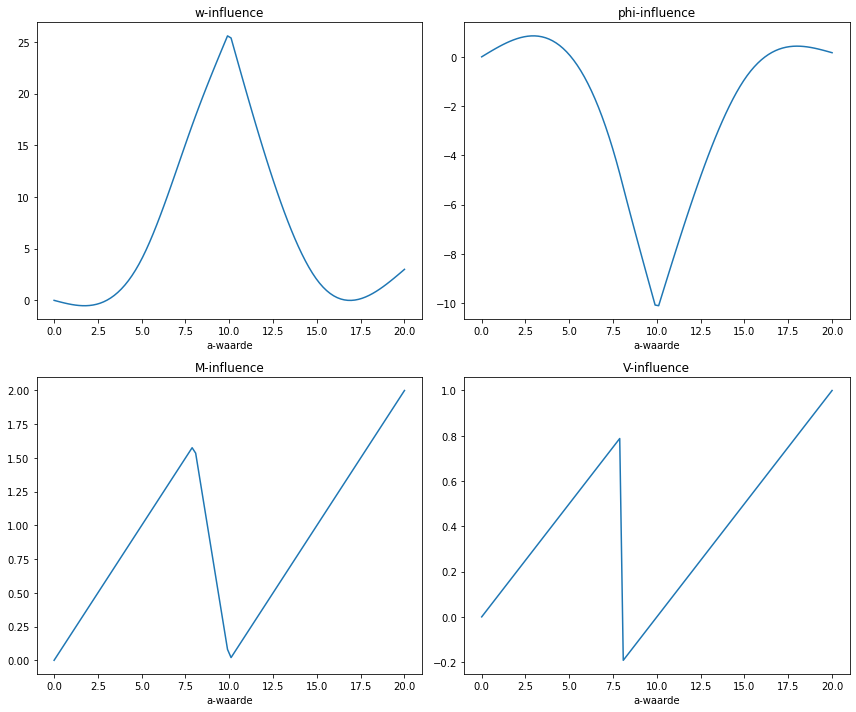

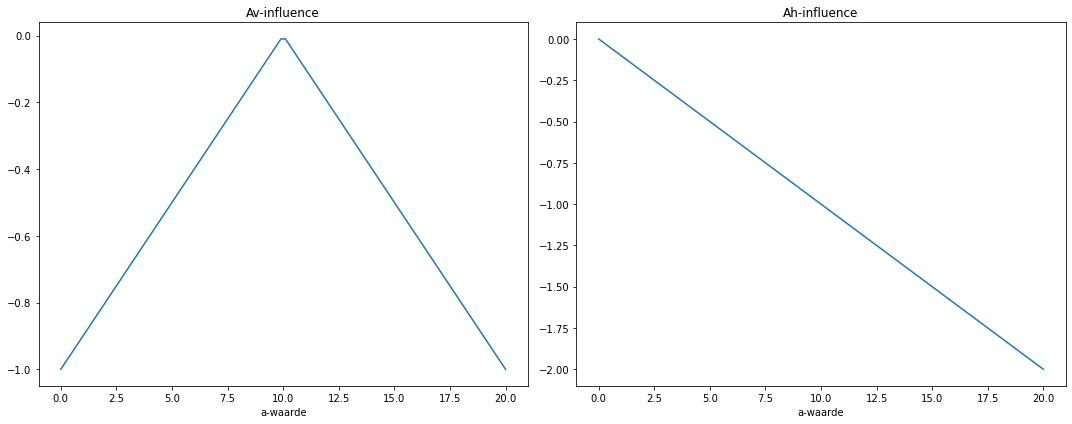

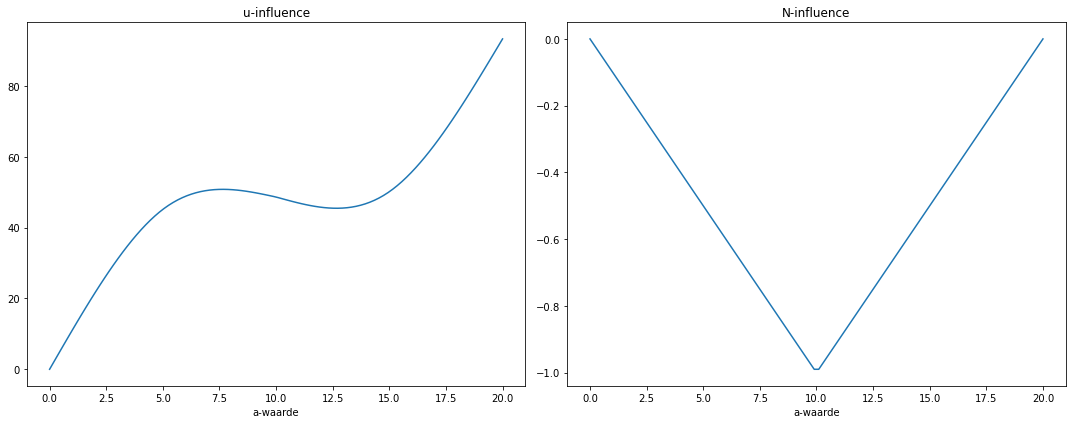

In [8]:
# voorbeeld 6, plotten van de invloedslijn

Av = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 - sp.cos(174532925199433*alpha/10000000000000000)
Cv = sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Dv= sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - 2*sp.cos(174532925199433*alpha/10000000000000000)
Bv = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10
Ah = sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 + sp.sin(174532925199433*alpha/10000000000000000) - 2*sp.cos(174532925199433*alpha/10000000000000000)
Ch = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Dh = sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Bh = sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 - 2*sp.cos(174532925199433*alpha/10000000000000000)

uc = -sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 119*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 10*sp.sin(174532925199433*alpha/10000000000000000) - 250*sp.cos(174532925199433*alpha/10000000000000000)/3
Cphi = -sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 - 19*sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/30 + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10 + 5*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/60 - sp.sin(174532925199433*alpha/10000000000000000) - 137*sp.cos(174532925199433*alpha/10000000000000000)/6
wc = -2*sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 131*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 310*sp.cos(174532925199433*alpha/10000000000000000)/3
ud = sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 - 131*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 + sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 10*sp.sin(174532925199433*alpha/10000000000000000) + 250*sp.cos(174532925199433*alpha/10000000000000000)/3
phiS = -sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 + sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + 206*sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/15 + sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + 19*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/30 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 - 2*sp.sin(174532925199433*alpha/10000000000000000)
wd = -sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 - sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 2*sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 3*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 143*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 310*sp.cos(174532925199433*alpha/10000000000000000)/3

w = (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Cv*sf(s, 5, 3) + wc*sf(s, 5, 0) + phiS*sf(s, 10, 1) + (1/6)*Dv*sf(s, 15, 3) + (1/6)*Bv*sf(s, 20, 3) + wd*sf(s, 15, 0) - Cphi*s
wV = (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Cv*sf(s, 5, 3) + phiS*sf(s, 10, 1) + (1/6)*Dv*sf(s, 15, 3) + (1/6)*Bv*sf(s, 20, 3) - Cphi*s   
phi = sp.diff(w, s)*-1
M = sp.diff(phi, s)
V = sp.diff(wV, s, 3)

U = -Ah*sf(s, 0, 1) - Ch*sf(s, 5, 1) - uc*sf(s, 5, 0) - Dh*sf(s, 15, 1) - ud*sf(s, 15, 0) - Bh*sf(s, 20, 1) + 1*sp.sin(hoek_rad)*sf(s, a, 1)
N = sp.diff(U, s)

s_value = 8
a_values = np.linspace(0, 20, 100)

condition1 = And(5 <= s_value, s_value <= 15)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90

w_values = [w.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
phi_values = [phi.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
M_values = [M.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
V_values = [V.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Av_values = [Av.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Ah_values = [Ah.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
u_values = [U.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
N_values = [N.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(a_values, w_values)
plt.title('w-influence')
plt.xlabel('a-waarde')
plt.subplot(222)
plt.plot(a_values, phi_values)
plt.title('phi-influence')
plt.xlabel('a-waarde')
plt.subplot(223)
plt.plot(a_values, M_values)
plt.title('M-influence')
plt.xlabel('a-waarde')
plt.subplot(224)
plt.plot(a_values, V_values)
plt.title('V-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(a_values, Av_values)
plt.title('Av-influence')
plt.xlabel('a-waarde')
plt.subplot(122)
plt.plot(a_values, Ah_values)
plt.title('Ah-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(a_values, u_values)
plt.title('u-influence')
plt.xlabel('a-waarde')
plt.subplot(122)
plt.plot(a_values, N_values)
plt.title('N-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

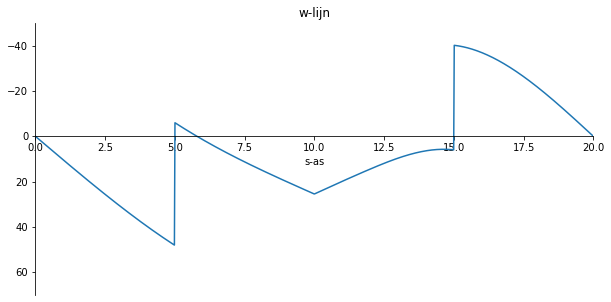

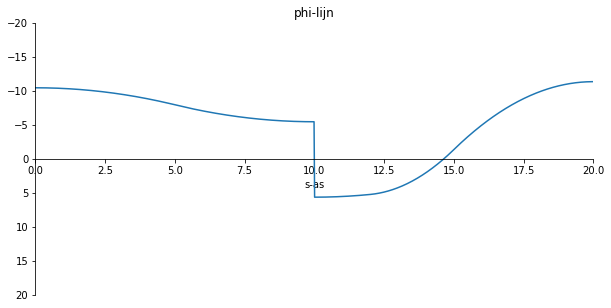

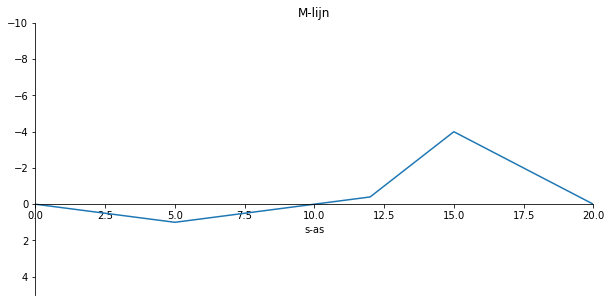

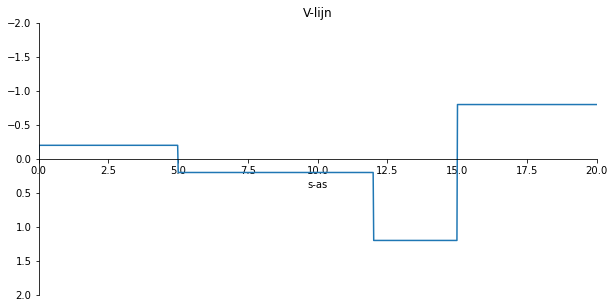

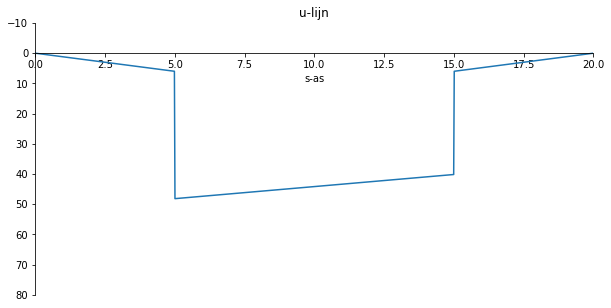

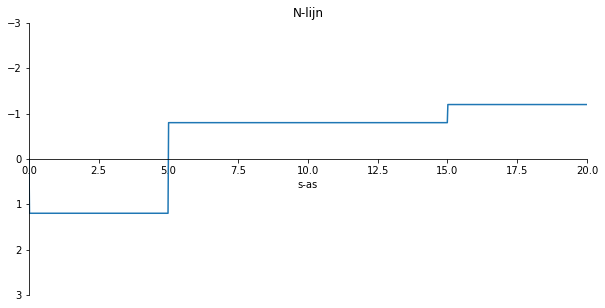

In [9]:
#Voorbeeld 6, plotten van de interne krachtslijnen
a_value = 12

condition1 = And(5 <= a_value, a_value <= 15)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90

w_numpy = sp.lambdify(s, w.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
phi_numpy = sp.lambdify(s, phi.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
M_numpy = sp.lambdify(s, M.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
V_numpy = sp.lambdify(s, V.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
u_numpy = sp.lambdify(s, U.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
N_numpy = sp.lambdify(s, N.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), w_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([70, -50])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('w-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), phi_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([20, -20])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('phi-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), M_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([5, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('M-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), V_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([2, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('V-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), u_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([80, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('u-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), N_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([3, -3])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('N-lijn')
plt.xlabel('s-as')

plt.show()

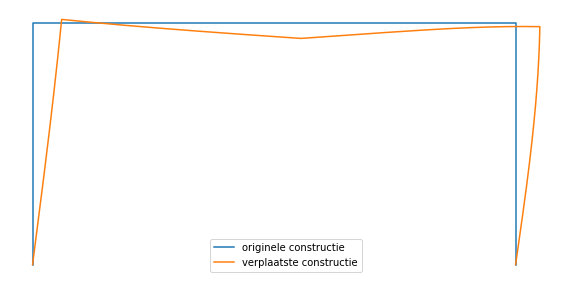

In [10]:
# Voorbeeld 6, plotten van de 2D doobuiging
Av = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 - sp.cos(174532925199433*alpha/10000000000000000)
Cv = sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Dv= sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - 2*sp.cos(174532925199433*alpha/10000000000000000)
Bv = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10
Ah = sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 + sp.sin(174532925199433*alpha/10000000000000000) - 2*sp.cos(174532925199433*alpha/10000000000000000)
Ch = -sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Dh = sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 - sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/5 + 2*sp.cos(174532925199433*alpha/10000000000000000)
Bh = sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10 - 2*sp.cos(174532925199433*alpha/10000000000000000)

uc = -sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 119*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 10*sp.sin(174532925199433*alpha/10000000000000000) - 250*sp.cos(174532925199433*alpha/10000000000000000)/3
Cphi = -sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 - 19*sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/30 + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10 + 5*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/2 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/60 - sp.sin(174532925199433*alpha/10000000000000000) - 137*sp.cos(174532925199433*alpha/10000000000000000)/6
wc = -2*sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) - sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 131*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 310*sp.cos(174532925199433*alpha/10000000000000000)/3
ud = sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 - 131*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 + sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 10*sp.sin(174532925199433*alpha/10000000000000000) + 250*sp.cos(174532925199433*alpha/10000000000000000)/3
phiS = -sf(5, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 + sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + 206*sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/15 + sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/5 + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 + 19*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/30 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/30 - 2*sp.sin(174532925199433*alpha/10000000000000000)
wd = -sf(5, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 - sf(10, a, 1)*sp.cos(174532925199433*alpha/10000000000000000) - 2*sf(15, a, 1)*sp.sin(174532925199433*alpha/10000000000000000) + sf(15, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/6 + 3*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/2 + 143*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/12 - sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12 - 310*sp.cos(174532925199433*alpha/10000000000000000)/3

w = ((1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 5, 3) + wc*sf(x, 5, 0) + phiS*sf(x, 10, 1) + (1/6)*Dv*sf(x, 15, 3) + (1/6)*Bv*sf(x, 20, 3) + wd*sf(x, 15, 0) - Cphi*x)/80
U = (-Ah*sf(x, 0, 1) - Ch*sf(x, 5, 1) - uc*sf(x, 5, 0) - Dh*sf(x, 15, 1) - ud*sf(x, 15, 0) - Bh*sf(x, 20, 1) + 1*sp.sin(hoek_rad)*sf(x, a, 1))/80

a_value2 = 12

condition1 = And(5 <= a_value2, a_value2 <= 15)

if condition1:
    alpha_value2 = 0
else:
    alpha_value2 = 90

u2_test = U.subs(a, a_value).subs(alpha, alpha_value2)
w2_test = w.subs(a, a_value).subs(alpha, alpha_value2)


x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * 0
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * (x-5)
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (10)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * -x
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * -5
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (x-20)).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * w2_test
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * u2_test
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * -w2_test).expand().rewrite(sp.Piecewise)
z_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * -u2_test
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * w2_test
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * u2_test).expand().rewrite(sp.Piecewise)
x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)


plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)),z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='verplaatste constructie')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()

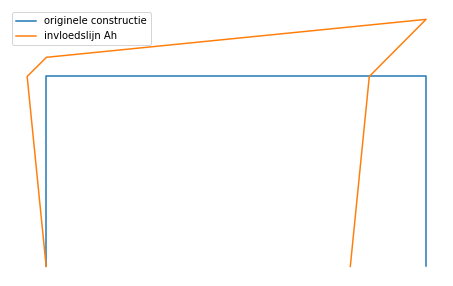

In [11]:
# voorbeeld 6, 2D plot van invloedslijnen
x_value = 8

condition1 = And(5 <= x_value, a_value <= 15)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90

w2 = ((1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 5, 3) + wc*sf(x, 5, 0) + phiS*sf(x, 10, 1) + (1/6)*Dv*sf(x, 15, 3) + (1/6)*Bv*sf(x, 20, 3) + wd*sf(x, 15, 0) - Cphi*x)/factor
wV2 = ((1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 5, 3) + phiS*sf(x, 10, 1) + (1/6)*Dv*sf(x, 15, 3) + (1/6)*Bv*sf(x, 20, 3) - Cphi*x)/factor  
phi2 = sp.diff(w2, x)*-1
M2 = sp.diff(phi2, x)
V2 = sp.diff(wV2, x, 3)

U2 = (-Ah*sf(x, 0, 1) - Ch*sf(x, 5, 1) - uc*sf(x, 5, 0) - Dh*sf(x, 15, 1) - ud*sf(x, 15, 0) - Bh*sf(x, 20, 1) + 1*sp.sin(hoek_rad)*sf(x, a, 1))/factor
N2 = sp.diff(U2, x)

Av2 = Av/factor
Ah2 = Ah/factor

u_testt = U2.subs(factor, 10).subs(x, x_value).subs(alpha, alpha_value)
w_testt = w2.subs(factor, 50).subs(x, x_value).subs(alpha, alpha_value)
phi_testt = phi2.subs(factor, 5).subs(x, x_value).subs(alpha, alpha_value)
M_testt = M2.subs(factor, 2).subs(x, x_value).subs(alpha, alpha_value)
V_testt = V2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
N_testt = N2.subs(factor, 5).subs(x, x_value).subs(alpha, alpha_value)
Av_testt = Av2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
Ah_testt = Ah2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)




u_test = u_testt.subs(a, x)
w_test = w_testt.subs(a, x)
phi_test = phi_testt.subs(a, x)
M_test = M_testt.subs(a, x)
V_test = V_testt.subs(a, x)
N_test = N_testt.subs(a, x)
Av_test = Av_testt.subs(a, x)
Ah_test = Ah_testt.subs(a, x)

x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * 0
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * (x-5)
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (10)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * -x
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * -5
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * (x-20)).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * Ah_test
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * 0
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * Ah_test).expand().rewrite(sp.Piecewise)
z_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,5,0)) * 0
               + (sp.SingularityFunction(x,5,0) - sp.SingularityFunction(x,15,0)) * Ah_test
                + (sp.SingularityFunction(x,15,0) - sp.SingularityFunction(x,20,0)) * 0).expand().rewrite(sp.Piecewise)
x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)


plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)), z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='invloedslijn Ah')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()

In [12]:
# voorbeeld 7, bepalen van de onbekenden
Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc, alpha, a = sp.symbols('Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc, alpha, a')

hoek_rad = sp.rad(alpha)

V20 = -Av - 1*sp.cos(hoek_rad) - Cv - Bv
M20 = -Am - 20*Av - 10*Cv - 1*sp.cos(hoek_rad)*sp.Function('sf')(20, a, 1)
N20 = -Ah - Ch - Bh + 1*sp.sin(hoek_rad)
w20 = 200*Am + (8000/6)*Av + (1000/6)*Cv + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(20, a, 3) + wc
u20 = -20*Ah -10*Ch - uc + 1*sp.sin(hoek_rad)*sp.Function('sf')(20, a, 1)
N10 = 1*sp.sin(hoek_rad) -Ah - Ch + Av + 1*sp.cos(hoek_rad)
V10 = -Av -Cv - 1*sp.cos(hoek_rad) - Ah - 1*sp.sin(hoek_rad)
u10 = 1*sp.sin(hoek_rad)*sp.Function('sf')(10, a, 1) -10*Ah - uc - 50*Am - (1000/6)*Av - (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(10, a, 3)
w10 = 50*Am + (1000/6)*Av + wc + (1/6)*sp.cos(hoek_rad)*sp.Function('sf')(10, a, 3) - 10*Ah + 1*sp.sin(hoek_rad)*sp.Function('sf')(10, a, 1)

oplossing = sp.solve((V20, M20, N20, N20, u20, w20, N10, V10, u10, w10), (Am, Av, Cv, Bv, Ah, Ch, Bh, uc, wc))
oplossing_in_breuken = {variabele: sp.nsimplify(waarde) for variabele, waarde in oplossing.items()}
oplossing_df = pd.DataFrame([(str(variabele), waarde) for variabele, waarde in oplossing_in_breuken.items()], columns=["Variabele", "Waarde"])

pd.set_option('display.latex.repr', True)
pd.set_option('display.max_colwidth', None)

display(oplossing_df)

,Variabele,Waarde
0,Am,"325109158819507*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/50000000000000000 - 399284549423957*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 29052027986743*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/250000000000000 + 61812825503709*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/50000000000000000 + 325109158819507*sin(174532925199433*alpha/10000000000000000)/1000000000000000 + 325109158819507*cos(174532925199433*alpha/10000000000000000)/1000000000000000"
1,Av,"-399284549423957*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 145457414908727*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/100000000000000000 + 636014519438161*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 370876953022253*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/1000000000000000000 - 399284549423957*sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 399284549423957*cos(174532925199433*alpha/10000000000000000)/10000000000000000"
2,Cv,"59182492503551*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/12500000000000000 - 2650060497659*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/1250000000000000 - 174548897890473*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 162554579409753*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/1000000000000000 + 83184281129991*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sin(174532925199433*alpha/10000000000000000)/1250000000000000 + 59182492503551*cos(174532925199433*alpha/10000000000000000)/1250000000000000"
3,Bv,"-148350781208901*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 148350781208901*sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 25185438476511*cos(174532925199433*alpha/10000000000000000)/25000000000000"
4,Ah,"-148350781208901*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 25185438476511*sin(174532925199433*alpha/10000000000000000)/25000000000000 - 25185438476511*cos(174532925199433*alpha/10000000000000000)/25000000000000"
5,Ch,"-325109158819507*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 394549950023673*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 399284549423957*sf(20, a, 1)*sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 883791888053027*sf(20, a, 1)*cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 61812825503709*sf(20, a, 3)*cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 39349781682361*sin(174532925199433*alpha/10000000000000000)/20000000000000 + 39349781682361*cos(174532925199433*alpha/10000000000000000)/20000000000000"
6,Bh,"399284549423957*sf(10, a, 1)*sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 145457414908727*sf(10, a, 3)*cos(174532925199433*alpha/10000000000000000)/10000000000000

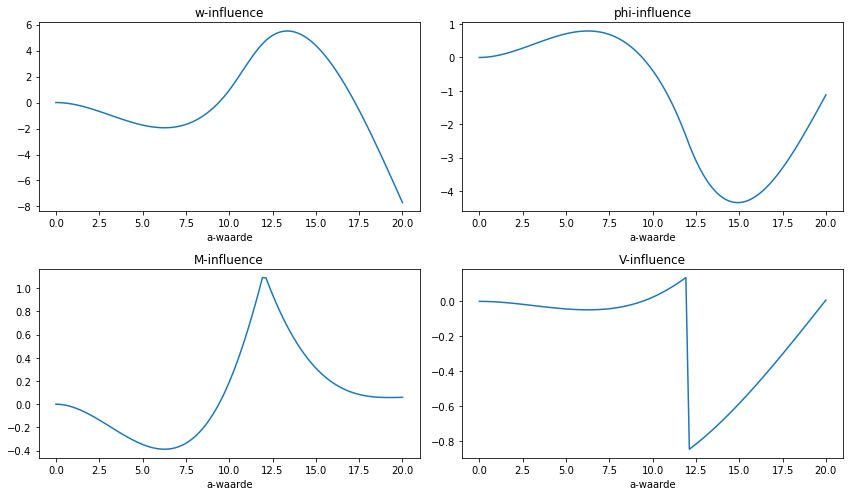

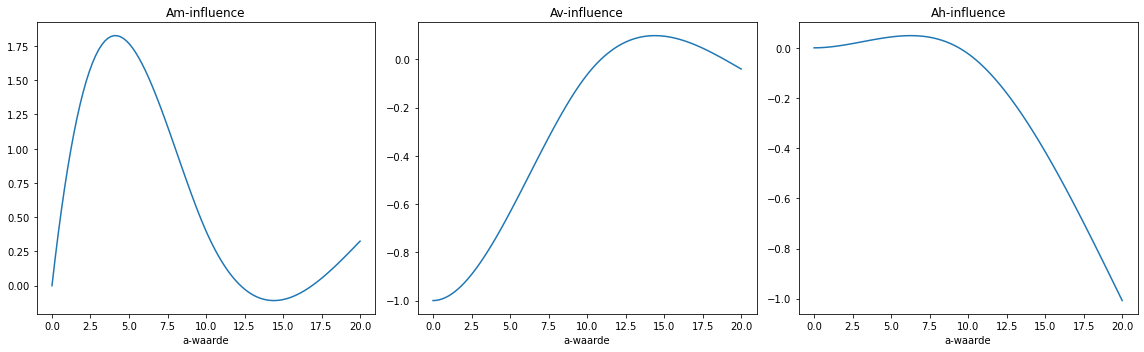

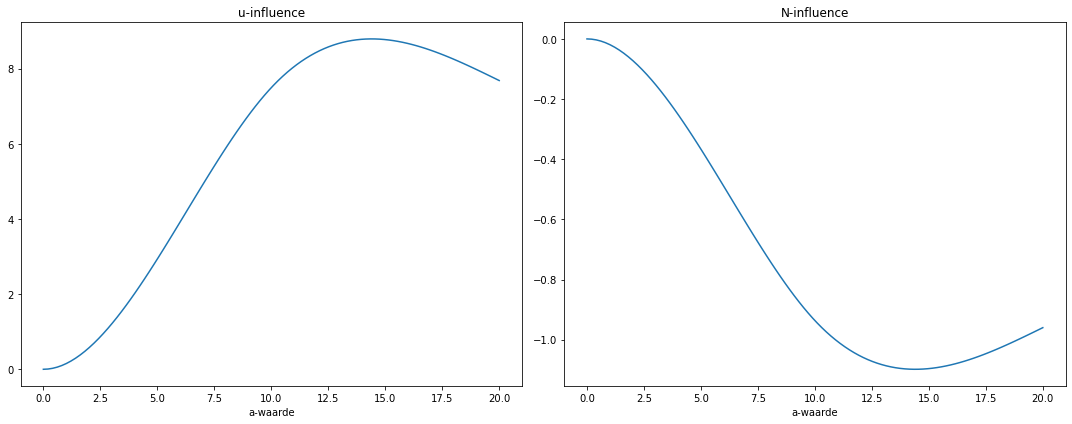

In [13]:
# Voorbeeld 7, plotten van de invloedslijnen
Am = 325109158819507*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 - 399284549423957*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 29052027986743*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000 + 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 + 325109158819507*sp.sin(174532925199433*alpha/10000000000000000)/1000000000000000 + 325109158819507*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000
Av = -399284549423957*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 145457414908727*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000000 + 636014519438161*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 370876953022253*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000000 - 399284549423957*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 399284549423957*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000
Cv = 59182492503551*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/12500000000000000 - 2650060497659*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1250000000000000 - 174548897890473*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 162554579409753*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000 + 83184281129991*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sp.sin(174532925199433*alpha/10000000000000000)/1250000000000000 + 59182492503551*sp.cos(174532925199433*alpha/10000000000000000)/1250000000000000
Bv = -148350781208901*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 148350781208901*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 25185438476511*sp.cos(174532925199433*alpha/10000000000000000)/25000000000000
Ah = -148350781208901*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 25185438476511*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000 - 25185438476511*sp.cos(174532925199433*alpha/10000000000000000)/25000000000000
Ch = -325109158819507*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 399284549423957*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 883791888053027*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 39349781682361*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000 + 39349781682361*sp.cos(174532925199433*alpha/10000000000000000)/20000000000000
Bh = 399284549423957*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 145457414908727*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000000 - 636014519438161*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 370876953022253*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 + 394549950023673*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000000 + 399284549423957*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 240017886264401*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000
uc = 59182492503551*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/1250000000000000 - 2650060497659*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 + 912725551054763*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/1000000000000000 - 162554579409753*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000 + 83184281129991*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12500000000000000 + 59182492503551*sp.sin(174532925199433*alpha/10000000000000000)/125000000000000 + 59182492503551*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000
wc = -39349781682361*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000 - 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 + 240017886264401*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/250000000000000 + 220947972013257*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000 + 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 - 39349781682361*sp.sin(174532925199433*alpha/10000000000000000)/2000000000000 - 39349781682361*sp.cos(174532925199433*alpha/10000000000000000)/2000000000000


w = (1/2)*Am*sf(s, 0, 2) + (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Cv*sf(s, 10, 3) + wc*sf(s, 10, 0) + (1/6)*Bv*sf(s, 20, 3)
wV = (1/2)*Am*sf(s, 0, 2) + (1/6)*Av*sf(s, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(s, a, 3) + (1/6)*Cv*sf(s, 10, 3) + (1/6)*Bv*sf(s, 20, 3) 
phi = sp.diff(w, s)*-1
M = sp.diff(phi, s)
V = sp.diff(wV, s, 3)

U = -Ah*sf(s, 0, 1) - Ch*sf(s, 10, 1) - uc*sf(s, 10, 0) - Bh*sf(s, 20, 1) + 1*sp.sin(hoek_rad)*sf(s, a, 1)
N = sp.diff(U, s)

s_value = 12
a_values = np.linspace(0, 20, 100)

condition1 = And(10 <= s_value, s_value <= 20)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90

w_values = [w.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
phi_values = [phi.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
M_values = [M.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
V_values = [V.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Am_values = [Am.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Av_values = [Av.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
Ah_values = [Ah.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
u_values = [U.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]
N_values = [N.subs([(s, s_value), (a, a_value), (alpha, alpha_value)]) for a_value in a_values]

plt.figure(figsize=(12, 7))

plt.subplot(221)
plt.plot(a_values, w_values)
plt.title('w-influence')
plt.xlabel('a-waarde')
plt.subplot(222)
plt.plot(a_values, phi_values)
plt.title('phi-influence')
plt.xlabel('a-waarde')
plt.subplot(223)
plt.plot(a_values, M_values)
plt.title('M-influence')
plt.xlabel('a-waarde')
plt.subplot(224)
plt.plot(a_values, V_values)
plt.title('V-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.plot(a_values, Am_values)
plt.title('Am-influence')
plt.xlabel('a-waarde')
plt.subplot(132)
plt.plot(a_values, Av_values)
plt.title('Av-influence')
plt.xlabel('a-waarde')
plt.subplot(133)
plt.plot(a_values, Ah_values)
plt.title('Ah-influence')
plt.xlabel('a-waarde')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(a_values, u_values)
plt.title('u-influence')
plt.xlabel('a-waarde')
plt.subplot(122)
plt.plot(a_values, N_values)
plt.title('N-influence')
plt.xlabel('a-waarde')


plt.tight_layout()
plt.show()

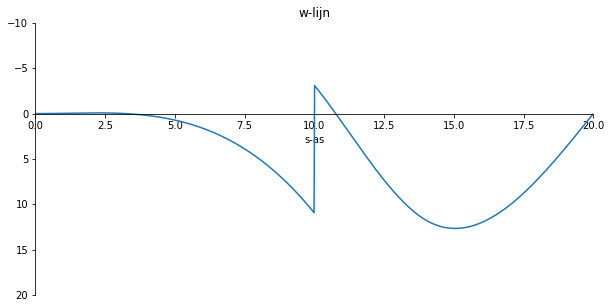

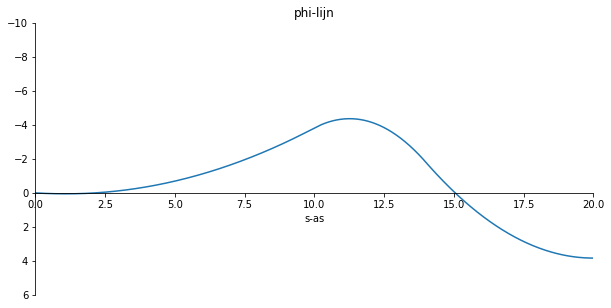

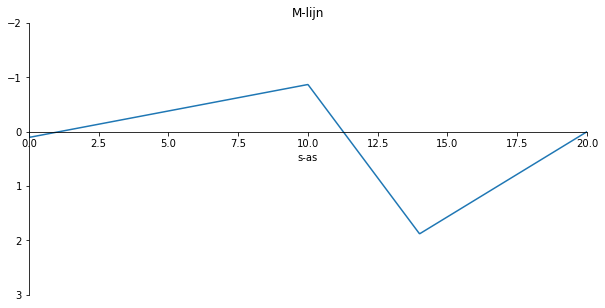

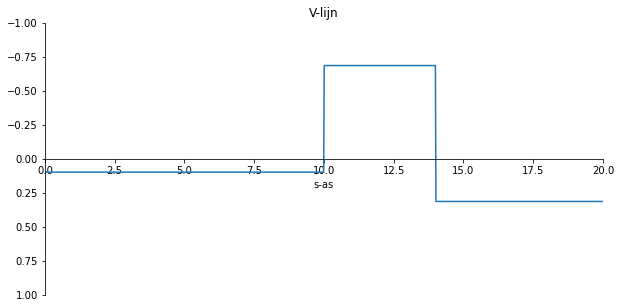

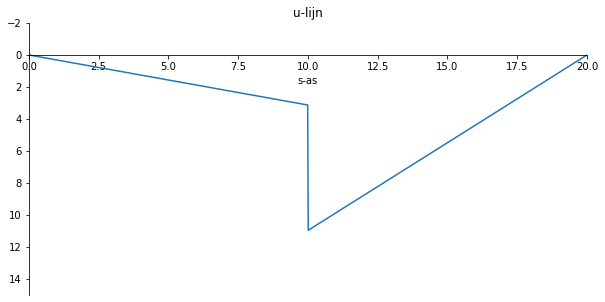

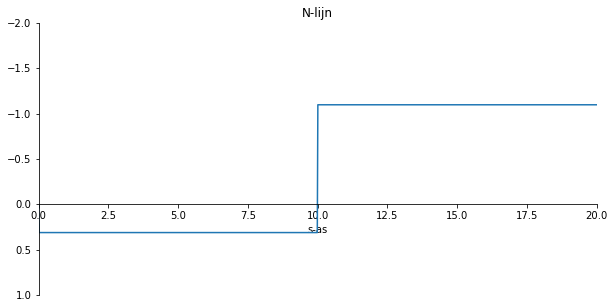

In [14]:
#Voorbeeld 7, plotten van de interne krachtslijnen
a_value = 14
condition1 = And(10 <= a_value, a_value <= 20)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90

w_numpy = sp.lambdify(s, w.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
phi_numpy = sp.lambdify(s, phi.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
M_numpy = sp.lambdify(s, M.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
V_numpy = sp.lambdify(s, V.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
u_numpy = sp.lambdify(s, U.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')
N_numpy = sp.lambdify(s, N.subs(a, a_value).subs(alpha, alpha_value).rewrite(sp.Piecewise), modules='numpy')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), w_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([20, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('w-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), phi_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([6, -10])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('phi-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), M_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([3, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('M-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), V_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([1, -1])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('V-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), u_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([15, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('u-lijn')
plt.xlabel('s-as')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, 20, 1000), N_numpy(np.linspace(0, 20, 1000)))
plt.xlim([0, 20])
plt.ylim([1, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('N-lijn')
plt.xlabel('s-as')

plt.show()

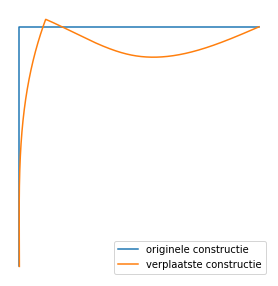

In [15]:
#Voorbeeld 7, plotten 2D van de doorbuiging

Am = 325109158819507*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 - 399284549423957*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 29052027986743*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000 + 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 + 325109158819507*sp.sin(174532925199433*alpha/10000000000000000)/1000000000000000 + 325109158819507*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000
Av = -399284549423957*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 145457414908727*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000000 + 636014519438161*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 370876953022253*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 394549950023673*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000000 - 399284549423957*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 399284549423957*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000
Cv = 59182492503551*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/12500000000000000 - 2650060497659*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1250000000000000 - 174548897890473*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 162554579409753*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000 + 83184281129991*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sp.sin(174532925199433*alpha/10000000000000000)/1250000000000000 + 59182492503551*sp.cos(174532925199433*alpha/10000000000000000)/1250000000000000
Bv = -148350781208901*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 148350781208901*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000000 - 25185438476511*sp.cos(174532925199433*alpha/10000000000000000)/25000000000000
Ah = -148350781208901*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/200000000000000000 + 83184281129991*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000000 + 59182492503551*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000000 + 15683360513441*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 - 54184859803251*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/200000000000000000 - 25185438476511*sp.sin(174532925199433*alpha/10000000000000000)/25000000000000 - 25185438476511*sp.cos(174532925199433*alpha/10000000000000000)/25000000000000
Ch = -325109158819507*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 + 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 399284549423957*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 883791888053027*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 - 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/500000000000000000 + 39349781682361*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000 + 39349781682361*sp.cos(174532925199433*alpha/10000000000000000)/20000000000000
Bh = 399284549423957*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 145457414908727*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000000 - 636014519438161*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/100000000000000000 - 370876953022253*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/10000000000000000 + 394549950023673*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/1000000000000000000 + 399284549423957*sp.sin(174532925199433*alpha/10000000000000000)/10000000000000000 - 240017886264401*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000
uc = 59182492503551*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/1250000000000000 - 2650060497659*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000 + 912725551054763*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/1000000000000000 - 162554579409753*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/100000000000000 + 83184281129991*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/12500000000000000 + 59182492503551*sp.sin(174532925199433*alpha/10000000000000000)/125000000000000 + 59182492503551*sp.cos(174532925199433*alpha/10000000000000000)/125000000000000
wc = -39349781682361*sf(10, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/20000000000000 - 394549950023673*sf(10, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 + 240017886264401*sf(20, a, 1)*sp.sin(174532925199433*alpha/10000000000000000)/250000000000000 + 220947972013257*sf(20, a, 1)*sp.cos(174532925199433*alpha/10000000000000000)/250000000000000 + 61812825503709*sf(20, a, 3)*sp.cos(174532925199433*alpha/10000000000000000)/50000000000000000 - 39349781682361*sp.sin(174532925199433*alpha/10000000000000000)/2000000000000 - 39349781682361*sp.cos(174532925199433*alpha/10000000000000000)/2000000000000



w = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 10, 3) + wc*sf(x, 10, 0) + (1/6)*Bv*sf(x, 20, 3))/10
U = (-Ah*sf(x, 0, 1) - Ch*sf(x, 10, 1) - uc*sf(x, 10, 0) - Bh*sf(x, 20, 1) + 1*sp.sin(hoek_rad)*sf(s, a, 1))/10

a_value2 = 14
condition1 = And(10 < a_value2, a_value2 <= 20)

if condition1:
    alpha_value2 = 0
else:
    alpha_value2 = 90


u_test = U.subs(a, a_value2).subs(alpha, alpha_value2)
w_test = w.subs(a, a_value2).subs(alpha, alpha_value2)

x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * 0
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * (x-10)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * -x
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * -10).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * w_test
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * u_test).expand().rewrite(sp.Piecewise)
z_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * -u_test
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * w_test).expand().rewrite(sp.Piecewise)
x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)



plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)),z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='verplaatste constructie')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()

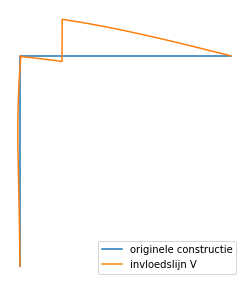

In [16]:
# voorbeeld 7, 2D van de invloedslijn
x_value = 12

condition1 = And(10 <= x_value, x_value <= 20)

if condition1:
    alpha_value = 0
else:
    alpha_value = 90


w2 = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 10, 3) + wc*sf(x, 10, 0) + (1/6)*Bv*sf(x, 20, 3))/factor
wV2 = ((1/2)*Am*sf(x, 0, 2) + (1/6)*Av*sf(x, 0, 3) + (1/6)*sp.cos(hoek_rad)*sf(x, a, 3) + (1/6)*Cv*sf(x, 10, 3) + (1/6)*Bv*sf(x, 20, 3))/factor
phi2 = sp.diff(w2, x)*-1
M2 = sp.diff(phi2, x)
V2 = sp.diff(wV2, x, 3)


U2 = (-Ah*sf(x, 0, 1) - Ch*sf(x, 10, 1) - uc*sf(x, 10, 0) - Bh*sf(x, 20, 1) + 1*sp.sin(hoek_rad)*sf(x, a, 1))/factor
N2 = sp.diff(U2, x)

Am2 = Am/factor
Av2 = Av/factor
Ah2 = Ah/factor

u_testt = U2.subs(factor, 10).subs(x, x_value).subs(alpha, alpha_value)
w_testt = w2.subs(factor, 10).subs(x, x_value).subs(alpha, alpha_value)
phi_testt = phi2.subs(factor, 3).subs(x, x_value).subs(alpha, alpha_value)
M_testt = M2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
V_testt = V2.subs(factor, 1/2).subs(x, x_value).subs(alpha, alpha_value)
N_testt = N2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
Am_testt = Am2.subs(factor, 1/2).subs(x, x_value).subs(alpha, alpha_value)
Av_testt = Av2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)
Ah_testt = Ah2.subs(factor, 1).subs(x, x_value).subs(alpha, alpha_value)


u_test = u_testt.subs(a, x)
w_test = w_testt.subs(a, x)
phi_test = phi_testt.subs(a, x)
M_test = M_testt.subs(a, x)
V_test = V_testt.subs(a, x)
N_test = N_testt.subs(a, x)
Am_test = Am_testt.subs(a, x)
Av_test = Av_testt.subs(a, x)
Ah_test = Ah_testt.subs(a, x)

x_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * 0
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * (x-10)).expand().rewrite(sp.Piecewise)
z_structure = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * -x
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * -10).expand().rewrite(sp.Piecewise)
x_structure_numpy = sp.lambdify(x,x_structure)
z_structure_numpy = sp.lambdify(x,z_structure)

x_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * V_test
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * 0).expand().rewrite(sp.Piecewise)
z_res = ((sp.SingularityFunction(x,0,0) - sp.SingularityFunction(x,10,0)) * 0
               + (sp.SingularityFunction(x,10,0) - sp.SingularityFunction(x,20,0)) * V_test).expand().rewrite(sp.Piecewise)
x_res_numpy = sp.lambdify(x,x_res)
z_res_numpy = sp.lambdify(x,z_res)


plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,20,101)), z_structure_numpy(np.linspace(0,20,101)), label='originele constructie')
plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='invloedslijn V')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()

In [17]:
# voorbeeld 8, Onbekende uitrekenen

Av, Cv, Dv, Ev, Bv, Ah, Ch, Dh, Eh, uc, ud, ue, wc, wd, we, b, Cphi = sp.symbols('Av, Cv, Dv, Ev, Bv, Ah, Ch, Dh, Eh, uc, ud, ue, wc, wd, we, b, Cphi')
b = 5/(np.cos((30*np.pi)/180))

M202b = -Av*(20 + 2*b) - 1*sp.Function('sf')((20 + 2*b), a, 1) - Dv*(10 + b) - 10*Ev - Cv*(10 + 2*b)
w202b = (((20 + 2*b)**3)/6)*Av + (1/6)*sp.Function('sf')((20 + 2*b), a, 3) + (((10 + 2*b)**3)/6)*Cv + (((10 + b)**3)/6)*Dv + ((10**3)/6)*Ev - (20 + 2*b)*Cphi
V202b = -Av - 1 - Cv - Dv - Ev - Bv
N202b = -Ah - Ch - Dh - Eh
N10 = -Ah - Ch - np.cos((240*np.pi)/180)*(-Ah) + np.sin((240*np.pi)/180)*(-Av - 1)
V10 = -Av - 1 - Cv - np.sin((240*np.pi)/180)*(-Ah) - np.cos((240*np.pi)/180)*(-Av - 1)
N10b = -Ah - Ch - Dh - np.cos((240*np.pi)/180)*(-Ah - Ch) + np.sin((240*np.pi)/180)*(-Av - 1 - Cv)
V10b = -Av - 1 - Cv - Dv - np.sin((240*np.pi)/180)*(-Ah - Ch) - np.cos((240*np.pi)/180)*(-Av - 1 - Cv)
N102b = -Ah - Ch - Dh - Eh - np.cos((240*np.pi)/180)*(-Ah - Ch - Dh) + np.sin((240*np.pi)/180)*(-Av - 1 - Cv - Dv)
V102b = -Av - 1 - Cv - Dv - Ev - np.sin((240*np.pi)/180)*(-Ah - Ch - Dh) - np.cos((240*np.pi)/180)*(-Av - 1 - Cv - Dv)

u10 = -10*Ah - uc - np.cos((240*np.pi)/180)*(-10*Ah) + np.sin((240*np.pi)/180)*(((10**3)/6)*Av + (1/6)*sp.Function('sf')(10, a, 3) -10*Cphi)
w10 = ((10**3)/6)*Av + (1/6)*sp.Function('sf')(10, a, 3) -10*Cphi + wc - np.sin((240*np.pi)/180)*(-10*Ah) - np.cos((240*np.pi)/180)*(((10**3)/6)*Av + (1/6)*sp.Function('sf')(10, a, 3) -10*Cphi)
u10b = -(10 + b)*Ah - Ch*b - uc - ud - np.cos((240*np.pi)/180)*(-(10 + b)*Ah - Ch*b - uc) + np.sin((240*np.pi)/180)*((((10+b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + b), a, 3) + ((b**3)/6)*Cv -(10 + b)*Cphi + wc)
w10b = (((10+b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + b), a, 3) + ((b**3)/6)*Cv -(10 + b)*Cphi + wc + wd - np.sin((240*np.pi)/180)*(-(10 + b)*Ah - Ch*b - uc) - np.cos((240*np.pi)/180)*((((10+b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + b), a, 3) + ((b**3)/6)*Cv -(10 + b)*Cphi + wc)
u102b = -(10 + 2*b)*Ah - Ch*2*b - uc - Dh*b - ud - ue - np.cos((240*np.pi)/180)*(-(10 + 2*b)*Ah - Ch*2*b - uc - Dh*b - ud) + np.sin((240*np.pi)/180)*((((10 + 2*b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + 2*b), a, 3) + (((2*b)**3)/6)*Cv -(10 + 2*b)*Cphi + wc + wd + ((b**3)/6)*Dv)
w102b = (((10 + 2*b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + 2*b), a, 3) + (((2*b)**3)/6)*Cv -(10 + 2*b)*Cphi + wc + wd + ((b**3)/6)*Dv + we - np.sin((240*np.pi)/180)*(-(10 + 2*b)*Ah - Ch*2*b - uc - Dh*b - ud) - np.cos((240*np.pi)/180)*((((10 + 2*b)**3)/6)*Av + (1/6)*sp.Function('sf')((10 + 2*b), a, 3) + (((2*b)**3)/6)*Cv -(10 + 2*b)*Cphi + wc + wd + ((b**3)/6)*Dv)

oplossing = sp.solve((M202b, w202b, V202b, N202b, N10, V10, N10b, V10b, N102b, V102b, u10, w10, u10b, w10b, u102b, w102b), (Av, Cv, Dv, Ev, Bv, Ah, Ch, Dh, Eh, uc, ud, ue, wc, wd, we, b, Cphi))
oplossing_in_breuken = {variabele: sp.nsimplify(waarde) for variabele, waarde in oplossing.items()}
oplossing_df = pd.DataFrame([(str(variabele), waarde) for variabele, waarde in oplossing_in_breuken.items()], columns=["Variabele", "Waarde"])

pd.set_option('display.latex.repr', True)
pd.set_option('display.max_colwidth', None)

display(oplossing_df)

,Variabele,Waarde
0,Av,"121748225867393/100000000000000 - 702913709778989*sf(12618802153517/400000000000, a, 1)/10000000000000000"
1,Cv,"3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000 - 33262233880109/10000000000000"
2,Dv,"196855839628573*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 3881382645371/3125000000000000000000000000"
3,Ev,"332622338801089/100000000000000 - 3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000"
4,Bv,"175728427444747*sf(12618802153517/400000000000, a, 1)/2500000000000000 - 221748225867393/100000000000000"
5,Ah,"340964316003319*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 215128062252757/100000000000000000000000000000"
6,Ch,"48009899211323/25000000000000 - 608741129336967*sf(12618802153517/400000000000, a, 1)/10000000000000000"
7,Dh,"121748225867393*sf(12618802153517/400000000000, a, 1)/1000000000000000 - 48009899211323/12500000000000"
8,Eh,"48009899211323/25000000000000 - 304370564668483*sf(12618802153517/400000000000, a, 1)/5000000000000000"
9,uc,"-72168783648703*sf(10, a, 3)/500000000000000 - 236954847200147*sf(12618802153517/400000000000, a, 1)/5000000000000 + 457531754730549*sf(12618802153517/400000000000, a, 3)/10000000000000000 + 202913709778991/1000000000000"


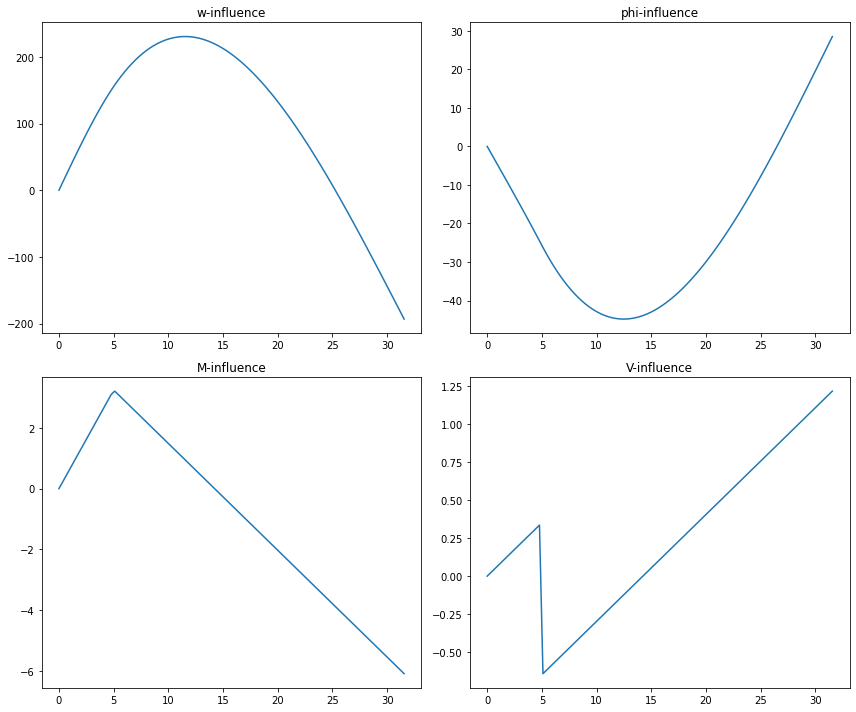

In [18]:
# voorbeeld 8, plotten van de invloedslijnen
Av = 121748225867393/100000000000000 - 702913709778989*sf(12618802153517/400000000000, a, 1)/10000000000000000
Cv = 3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000 - 33262233880109/10000000000000
Dv = 196855839628573*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 3881382645371/3125000000000000000000000000
Ev = 332622338801089/100000000000000 - 3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000
Bv = 175728427444747*sf(12618802153517/400000000000, a, 1)/2500000000000000 - 221748225867393/100000000000000
Ah = 340964316003319*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 215128062252757/100000000000000000000000000000
Ch = 48009899211323/25000000000000 - 608741129336967*sf(12618802153517/400000000000, a, 1)/10000000000000000
Dh = 121748225867393*sf(12618802153517/400000000000, a, 1)/1000000000000000 - 48009899211323/12500000000000
Eh = 48009899211323/25000000000000 - 304370564668483*sf(12618802153517/400000000000, a, 1)/5000000000000000
uc = -72168783648703*sf(10, a, 3)/500000000000000 - 236954847200147*sf(12618802153517/400000000000, a, 1)/5000000000000 + 457531754730549*sf(12618802153517/400000000000, a, 3)/10000000000000000 + 202913709778991/1000000000000
ud = 433012701892219*sf(10, a, 3)/1000000000000000 - 72168783648703*sf(157735026918963/10000000000000, a, 3)/500000000000000 + 27760181294669*sf(12618802153517/400000000000, a, 1)/312500000000 - 162726856926153*sf(12618802153517/400000000000, a, 3)/2500000000000000 - 19542882696157/31250000000
ue = -433012701892219*sf(10, a, 3)/1000000000000000 + 433012701892219*sf(157735026918963/10000000000000, a, 3)/1000000000000000 - 72168783648703*sf(8618802153517/400000000000, a, 3)/500000000000000 - 1054994295827*sf(12618802153517/400000000000, a, 1)/39062500000 + 12085979560879*sf(12618802153517/400000000000, a, 3)/625000000000000 + 211229268249019/500000000000
wc = -sf(10, a, 3)/4 - 205208917225187*sf(12618802153517/400000000000, a, 1)/2500000000000 + 198117061317363*sf(12618802153517/400000000000, a, 3)/2500000000000000 + 351456854889497/1000000000000
wd = sf(10, a, 3)/4 - sf(157735026918963/10000000000000, a, 3)/4 - 57610369319079*sf(12618802153517/400000000000, a, 1)/5000000000000 + 457531754730549*sf(12618802153517/400000000000, a, 3)/10000000000000000 - 85463718761807/250000000000
we = sf(10, a, 3)/4 + sf(157735026918963/10000000000000, a, 3)/4 - sf(8618802153517/400000000000, a, 3)/4 + 60486859553083*sf(12618802153517/400000000000, a, 1)/625000000000 - 167468245269451*sf(12618802153517/400000000000, a, 3)/5000000000000000 - 365859824652891/500000000000
Cphi = -66437606423033*sf(12618802153517/400000000000, a, 1)/10000000000000 + 66039020439121*sf(12618802153517/400000000000, a, 3)/12500000000000000 + 10930456992633/250000000000


w = (1/6)*Av*sf(s, 0, 3) + (1/6)*sf(s, a, 3) + (1/6)*Cv*sf(s, 10, 3) + wc*sf(s, 10, 0) + (1/6)*Dv*sf(s, (10 + b), 3) + wd*sf(s, (10 + b), 0) + (1/6)*Ev*sf(s, (10 + 2*b), 3) + we*sf(s, (10 + 2*b), 0) + (1/6)*Bv*sf(s, (20 + 2*b), 3) - Cphi*s
wV = (1/6)*Av*sf(s, 0, 3) + (1/6)*sf(s, a, 3) + (1/6)*Cv*sf(s, 10, 3) + (1/6)*Dv*sf(s, (10 + b), 3) + (1/6)*Ev*sf(s, (10 + 2*b), 3) + (1/6)*Bv*sf(s, (20 + 2*b), 3) - Cphi*s
phi = sp.diff(w, s)*-1
M = sp.diff(phi, s)
V = sp.diff(wV, s, 3)

U = -Ah*sf(s, 0, 1) - Ch*sf(s, 10, 1) - uc*sf(s, 10, 0) - Dh*sf(s, (10 + b), 1) - ud*sf(s, (10 + b), 0) - Eh*sf(s, (10 + 2*b), 1) - ue*sf(s, (10 + 2*b), 0)
N = sp.diff(U, s)

s_value = 5
a_values = np.linspace(0, (20 + 2*b), 100)

w_values = [w.subs([(s, s_value), (a, a_value)]) for a_value in a_values]
phi_values = [phi.subs([(s, s_value), (a, a_value)]) for a_value in a_values]
M_values = [M.subs([(s, s_value), (a, a_value)]) for a_value in a_values]
V_values = [V.subs([(s, s_value), (a, a_value)]) for a_value in a_values]

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(a_values, w_values)
plt.title('w-influence')
plt.subplot(222)
plt.plot(a_values, phi_values)
plt.title('phi-influence')
plt.subplot(223)
plt.plot(a_values, M_values)
plt.title('M-influence')
plt.subplot(224)
plt.plot(a_values, V_values)
plt.title('V-influence')

plt.tight_layout()
plt.show()

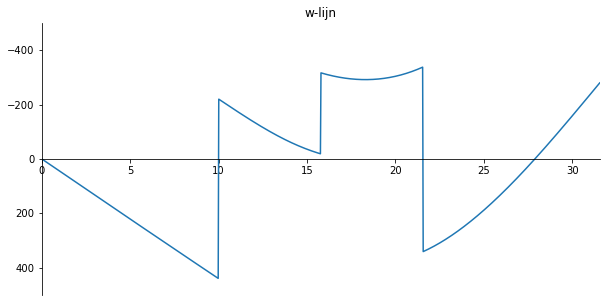

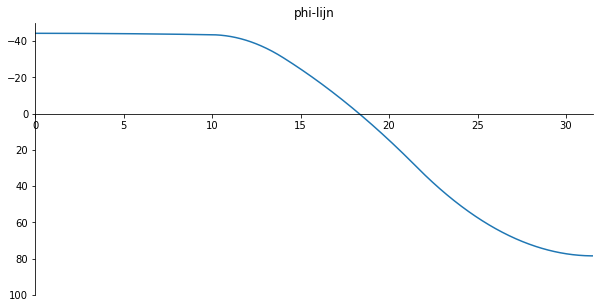

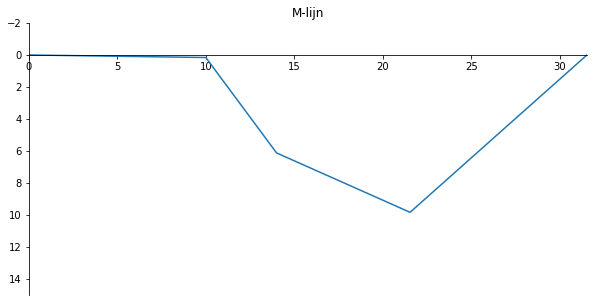

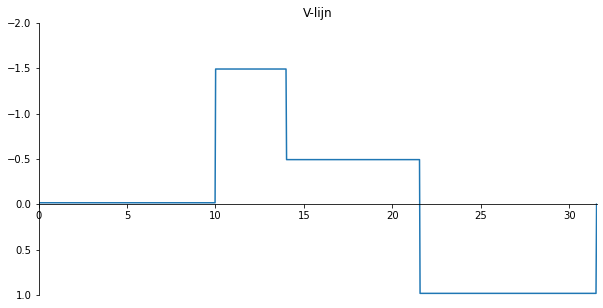

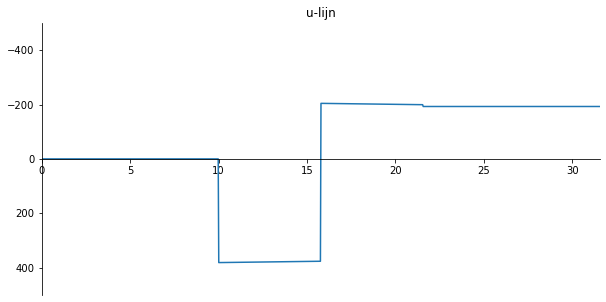

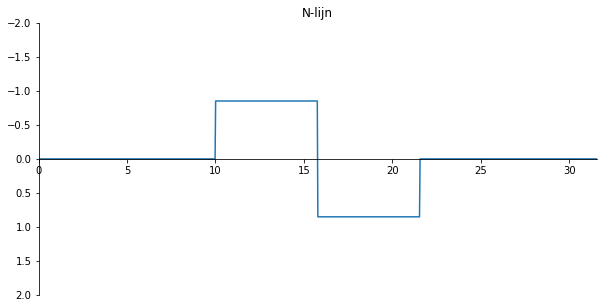

In [19]:
# Voorbeeld 8, interne krachtslijnen plotten
a_value = 14

w_numpy = sp.lambdify(s, w.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')
phi_numpy = sp.lambdify(s, phi.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')
M_numpy = sp.lambdify(s, M.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')
V_numpy = sp.lambdify(s, V.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')
u_numpy = sp.lambdify(s, U.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')
N_numpy = sp.lambdify(s, N.subs(a, a_value).rewrite(sp.Piecewise), modules='numpy')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), w_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([500, -500])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('w-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), phi_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([100, -50])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('phi-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), M_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([15, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('M-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), V_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([1, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('V-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), u_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([500, -500])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('u-lijn')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(0, (20+2*b), 1000), N_numpy(np.linspace(0, (20+2*b), 1000)))
plt.xlim([0, (20+2*b)])
plt.ylim([2, -2])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('N-lijn')

plt.show()

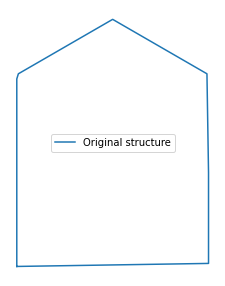

In [20]:
#Voorbeeld 8, plotten 2D van de doorbuiging

Av = 121748225867393/100000000000000 - 702913709778989*sf(12618802153517/400000000000, a, 1)/10000000000000000
Cv = 3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000 - 33262233880109/10000000000000
Dv = 196855839628573*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 3881382645371/3125000000000000000000000000
Ev = 332622338801089/100000000000000 - 3294908014589*sf(12618802153517/400000000000, a, 1)/31250000000000
Bv = 175728427444747*sf(12618802153517/400000000000, a, 1)/2500000000000000 - 221748225867393/100000000000000
Ah = 340964316003319*sf(12618802153517/400000000000, a, 1)/5000000000000000000000000000000 - 215128062252757/100000000000000000000000000000
Ch = 48009899211323/25000000000000 - 608741129336967*sf(12618802153517/400000000000, a, 1)/10000000000000000
Dh = 121748225867393*sf(12618802153517/400000000000, a, 1)/1000000000000000 - 48009899211323/12500000000000
Eh = 48009899211323/25000000000000 - 304370564668483*sf(12618802153517/400000000000, a, 1)/5000000000000000
uc = -72168783648703*sf(10, a, 3)/500000000000000 - 236954847200147*sf(12618802153517/400000000000, a, 1)/5000000000000 + 457531754730549*sf(12618802153517/400000000000, a, 3)/10000000000000000 + 202913709778991/1000000000000
ud = 433012701892219*sf(10, a, 3)/1000000000000000 - 72168783648703*sf(157735026918963/10000000000000, a, 3)/500000000000000 + 27760181294669*sf(12618802153517/400000000000, a, 1)/312500000000 - 162726856926153*sf(12618802153517/400000000000, a, 3)/2500000000000000 - 19542882696157/31250000000
ue = -433012701892219*sf(10, a, 3)/1000000000000000 + 433012701892219*sf(157735026918963/10000000000000, a, 3)/1000000000000000 - 72168783648703*sf(8618802153517/400000000000, a, 3)/500000000000000 - 1054994295827*sf(12618802153517/400000000000, a, 1)/39062500000 + 12085979560879*sf(12618802153517/400000000000, a, 3)/625000000000000 + 211229268249019/500000000000
wc = -sf(10, a, 3)/4 - 205208917225187*sf(12618802153517/400000000000, a, 1)/2500000000000 + 198117061317363*sf(12618802153517/400000000000, a, 3)/2500000000000000 + 351456854889497/1000000000000
wd = sf(10, a, 3)/4 - sf(157735026918963/10000000000000, a, 3)/4 - 57610369319079*sf(12618802153517/400000000000, a, 1)/5000000000000 + 457531754730549*sf(12618802153517/400000000000, a, 3)/10000000000000000 - 85463718761807/250000000000
we = sf(10, a, 3)/4 + sf(157735026918963/10000000000000, a, 3)/4 - sf(8618802153517/400000000000, a, 3)/4 + 60486859553083*sf(12618802153517/400000000000, a, 1)/625000000000 - 167468245269451*sf(12618802153517/400000000000, a, 3)/5000000000000000 - 365859824652891/500000000000
Cphi = -66437606423033*sf(12618802153517/400000000000, a, 1)/10000000000000 + 66039020439121*sf(12618802153517/400000000000, a, 3)/12500000000000000 + 10930456992633/250000000000


w = ((1/6)*Av*sf(x, 0, 3) + (1/6)*sf(x, a, 3) + (1/6)*Cv*sf(x, 10, 3) + wc*sf(x, 10, 0) + (1/6)*Dv*sf(x, (10 + b), 3) + wd*sf(x, (10 + b), 0) + (1/6)*Ev*sf(x, (10 + 2*b), 3) + we*sf(x, (10 + 2*b), 0) + (1/6)*Bv*sf(x, (20 + 2*b), 3) - Cphi*x)/factor
U = (-Ah*sf(x, 0, 1) - Ch*sf(x, 10, 1) - uc*sf(x, 10, 0) - Dh*sf(x, (10 + b), 1) - ud*sf(x, (10 + b), 0) - Eh*sf(x, (10 + 2*b), 1) - ue*sf(x, (10 + 2*b), 0))/factor


a_value = 5

u_test = U.subs(a, a_value).subs(factor, 500)
w_test = w.subs(a, a_value).subs(factor, 500)


x_structure = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * 0
               + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, (10+b), 0)) * np.cos((30*np.pi)/180)*(x - 10)
               + (sp.SingularityFunction(x, (10+b), 0) - sp.SingularityFunction(x, (10+2*b), 0)) * np.cos((30*np.pi)/180)*(x - 10)
               + (sp.SingularityFunction(x, (10+2*b), 0) - sp.SingularityFunction(x, (20+2*b), 0)) * 10).expand().rewrite(sp.Piecewise)

z_structure = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * -x
               + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, (10+b), 0)) * (np.sin((30*np.pi)/180)*(-x + 10) - 10)
               + (sp.SingularityFunction(x, (10+b), 0) - sp.SingularityFunction(x, (10+2*b), 0)) * (np.sin((30*np.pi)/180)*(x - 10) - 10 - 10*(np.tan((30*np.pi)/180)))
               + (sp.SingularityFunction(x, (10+2*b), 0) - sp.SingularityFunction(x, (20+2*b), 0)) * ((1/2)*x - 10 - (5/np.cos((30*np.pi)/180)))).expand().rewrite(sp.Piecewise)


x_res = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * w_test
               + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, (10+b), 0)) * w_test * u_test
               + (sp.SingularityFunction(x, (10+b), 0) - sp.SingularityFunction(x, (10+2*b), 0)) * -w_test * u_test
               + (sp.SingularityFunction(x, (10+2*b), 0) - sp.SingularityFunction(x, (20+2*b), 0)) * -w_test).expand().rewrite(sp.Piecewise)

z_res = ((sp.SingularityFunction(x, 0, 0) - sp.SingularityFunction(x, 10, 0)) * -u_test
               + (sp.SingularityFunction(x, 10, 0) - sp.SingularityFunction(x, (10+b), 0)) * w_test * -u_test
               + (sp.SingularityFunction(x, (10+b), 0) - sp.SingularityFunction(x, (10+2*b), 0)) * w_test * u_test
               + (sp.SingularityFunction(x, (10+2*b), 0) - sp.SingularityFunction(x, (20+2*b), 0)) * u_test).expand().rewrite(sp.Piecewise)

b_value = (5/np.cos((30*np.pi)/180))


x_structure_numpy = sp.lambdify(x, x_structure.subs(b, b_value), 'numpy')
z_structure_numpy = sp.lambdify(x, z_structure.subs(b, b_value), 'numpy')

x_res_numpy = sp.lambdify(x, x_res.subs(b, b_value))
z_res_numpy = sp.lambdify(x, z_res.subs(b, b_value))


plt.figure(figsize=(10, 5))
plt.plot(x_structure_numpy(np.linspace(0,(20+2*b_value),101)),z_structure_numpy(np.linspace(0,(20+2*b_value),101)), label='Original structure')
# plt.plot(x_res_numpy(np.linspace(0,20,2010))+x_structure_numpy(np.linspace(0,20,2010)),z_res_numpy(np.linspace(0,20,2010))+z_structure_numpy(np.linspace(0,20,2010)), label='Displaced structure')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.legend()
plt.show()